P452
Abhinav Roy
2011003


 Calculation Q1 



/tmp/ipykernel_542443/4213348314.py:63: RuntimeWarning: divide by zero encountered in log
  return np.log(x/2) - np.sin(5*x/2)
/tmp/ipykernel_542443/4213348314.py:81: RuntimeWarning: divide by zero encountered in divide
  return 1/x - (5/2)*np.cos(5*x/2)


Regula Falsi Method
Given Interval:
1.7 0.7324704287308086
2.7 -0.1499394813302795
Interval Accepted:
1.7 0.7324704287308086
2.7 -0.1499394813302795


/tmp/ipykernel_542443/4213348314.py:63: RuntimeWarning: divide by zero encountered in log
  return np.log(x/2) - np.sin(5*x/2)
/tmp/ipykernel_542443/4213348314.py:63: RuntimeWarning: divide by zero encountered in log
  return np.log(x/2) - np.sin(5*x/2)


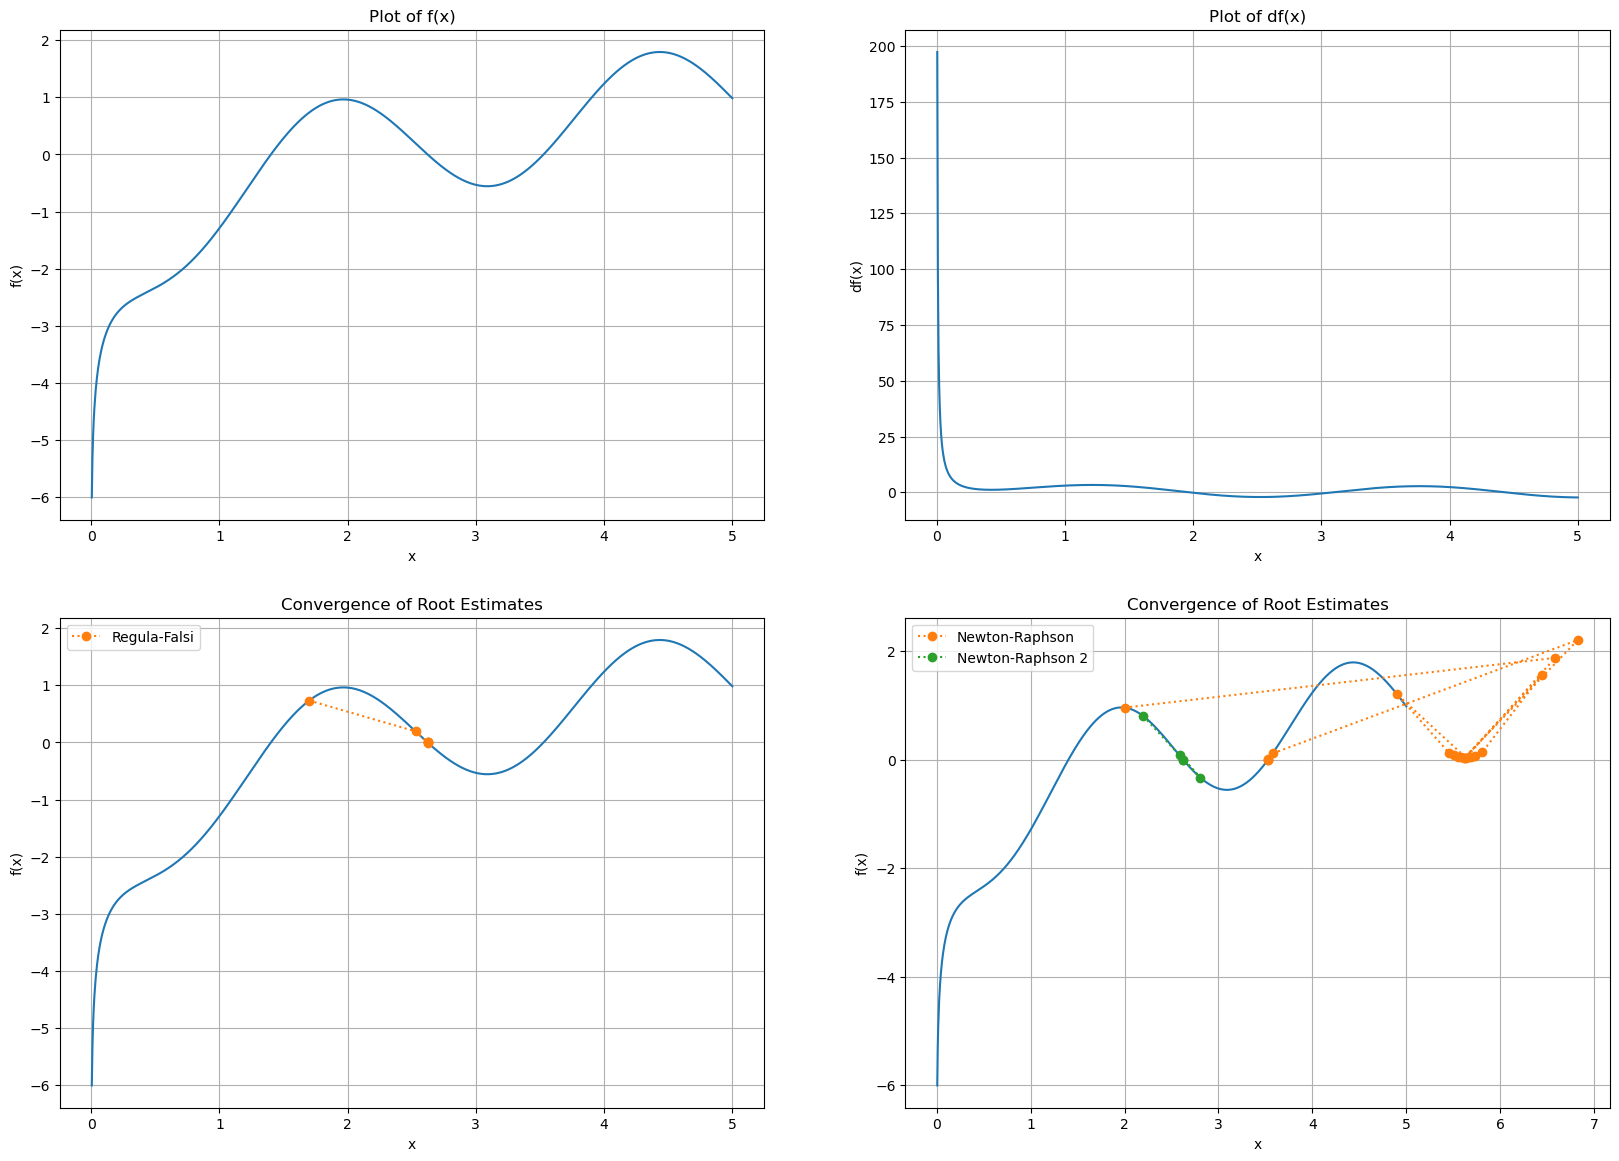


Root found by Regula-Falsi: 2.6231403720300803
Root found by Newton-Raphson Interval 1: 3.528425280128396
Root found by Newton-Raphson Interval 2: 2.6231402751560946


In [8]:
#Q1 - RUGULA FALSI VS NEWTON RHAPSON FOR ROOT FINDING

import numpy as np
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import lib_ar


#Regula Falsi Method as defined in library
'''
def regula_falsi(f,a,b,tol):
	print('Regula Falsi Method')
	print('Given Interval:')
	print (a, f(a))
	print (b, f(b))
	root_estimates = []
	f_estimate = []

	if f(a) * f(b) >= 0:
		print("Wrong interval!")
		print("You have not assumed right a and b!")
		print("Enter new values of a and b: \n")
		return regula_falsi(f, float(input('Enter x0: ')), float(input('Enter x1: ')), tol)

	c = a
	root_estimates.append(c)
	f_estimate.append(f(c))
	print("Interval Accepted:")
	print (a, f(a))
	print (b, f(b))

	while abs(f(c)) > tol:
		#point touching x axis
		c = (b - ((b - a) * f(b))/ (f(b) - f(a)))
		root_estimates.append(c)
		f_estimate.append(f(c))
		# Find root
		if f(c) * f(a) < 0:
			b = c
		else:
			a = c
	return c, root_estimates, f_estimate
#'''


# Newton-Raphson method as defined in library
'''
def newton_raphson(f, df, x, eps):
	root_estimates = [x]
	f_estimate = [f(x)]
	while abs(f(x)) > eps:
		x = x - f(x)/df(x)
		root_estimates.append(x)
		f_estimate.append(f(x))
	return x, root_estimates, f_estimate
#'''

print("\n Calculation Q1 \n")

# Define the function
def f(x):
	return np.log(x/2) - np.sin(5*x/2)

# Define the range
x = np.linspace(0, 5, 1000)

# Plot the function
plt.figure(figsize=(20, 14))

plt.subplot(2, 2, 1)
plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x)')
plt.grid(True)
#plt.show()

# Define the derivative of the function
def df(x):
	return 1/x - (5/2)*np.cos(5*x/2)

# Define the range
x = np.linspace(0, 5, 1000)

# Plot the function
plt.subplot(2, 2, 2)
plt.plot(x, df(x))
plt.xlabel('x')
plt.ylabel('df(x)')
plt.title('Plot of df(x)')
plt.grid(True)
#plt.show()

#Changing the interval since it is not right for Regula Falsi
#Can be fixed in the function itself as well
x0, x1 = 1.7, 2.7
root_rf, estimates_rf, f_estimate_rf = lib_ar.regula_falsi(f, x0, x1, 1e-6)

#Newton Rhapson on Interval 1
x0, x1 = 1.5, 2.5
x_q  = (x0+x1)/2

# Solve the equation 
root_nr, estimates_nr, f_estimate_nr = lib_ar.newton_raphson(f,df,x_q,1e-6)

#Newton Rhapson on Interval 2
x0, x1 = 1.7, 2.7
x_q  = (x0+x1)/2

# Solve the equation 
root_nr2, estimates_nr2, f_estimate_nr2 = lib_ar.newton_raphson(f,df,x_q,1e-6)

# Plot the convergence of the root estimates
plt.subplot(2, 2, 3)
plt.plot(x, f(x))
plt.plot(estimates_rf, f_estimate_rf, 'o:', label='Regula-Falsi')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Convergence of Root Estimates')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(x, f(x))
plt.plot(estimates_nr, f_estimate_nr, 'o:', label='Newton-Raphson')
plt.plot(estimates_nr2, f_estimate_nr2, 'o:', label='Newton-Raphson 2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Convergence of Root Estimates')
plt.legend()
plt.grid(True)

plt.show()

print()
print(f"Root found by Regula-Falsi: {root_rf}")
print(f"Root found by Newton-Raphson Interval 1: {root_nr}")
print(f"Root found by Newton-Raphson Interval 2: {root_nr2}")



In [7]:
#Q2 HEATED ROD

import numpy as np
from scipy.optimize import fsolve
import lib_ar

# Function to calculate the RK4 step as defined in library
'''
def rk4_step(f, x, y, h):
	k1 = h * f(x, y)
	k2 = h * f(x + 0.5*h, y + 0.5*k1)
	k3 = h * f(x + 0.5*h, y + 0.5*k2)
	k4 = h * f(x + h, y + k3)
	return y + (k1 + 2*k2 + 2*k3 + k4) / 6
#'''

# Constants
L = 10.0
alpha = 0.01
Ta = 20.0
T0 = 40.0
TL = 200.0


# System of ODEs
def f(x, y):
	return np.array([y[1], alpha*(Ta - y[0])])

# Shooting method
def shooting(u):
	N = 1000
	x = np.linspace(0, L, N)
	h = x[1] - x[0]
	y = np.zeros((N, 2))
	y[0, 0] = T0
	y[0, 1] = u
	for i in range(N-1):
		y[i+1] = lib_ar.rk4_step(f, x[i], y[i], h)
	return y[-1, 0] - TL

# Solve for the initial value of u
u0 = fsolve(shooting, 1)[0]

# Solve the ODEs with the found initial value
N = 1000
x = np.linspace(0, L, N)
h = x[1] - x[0]
y = np.zeros((N, 2))
y[0, 0] = T0
y[0, 1] = u0
for i in range(N-1):
	y[i+1] = lib_ar.rk4_step(f, x[i], y[i], h)

# Find the x where T = 100
idx = np.argmin(np.abs(y[:, 0] - 100))

print("\n Calculation Q2 \n")
print(f"The temperature is T = 100°C at x = {x[idx]} m")




 Calculation Q2 

The temperature is T = 100°C at x = 3.083083083083083 m


/tmp/ipykernel_542443/912431844.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[0, 1] = u



 Plots for Q3 : 



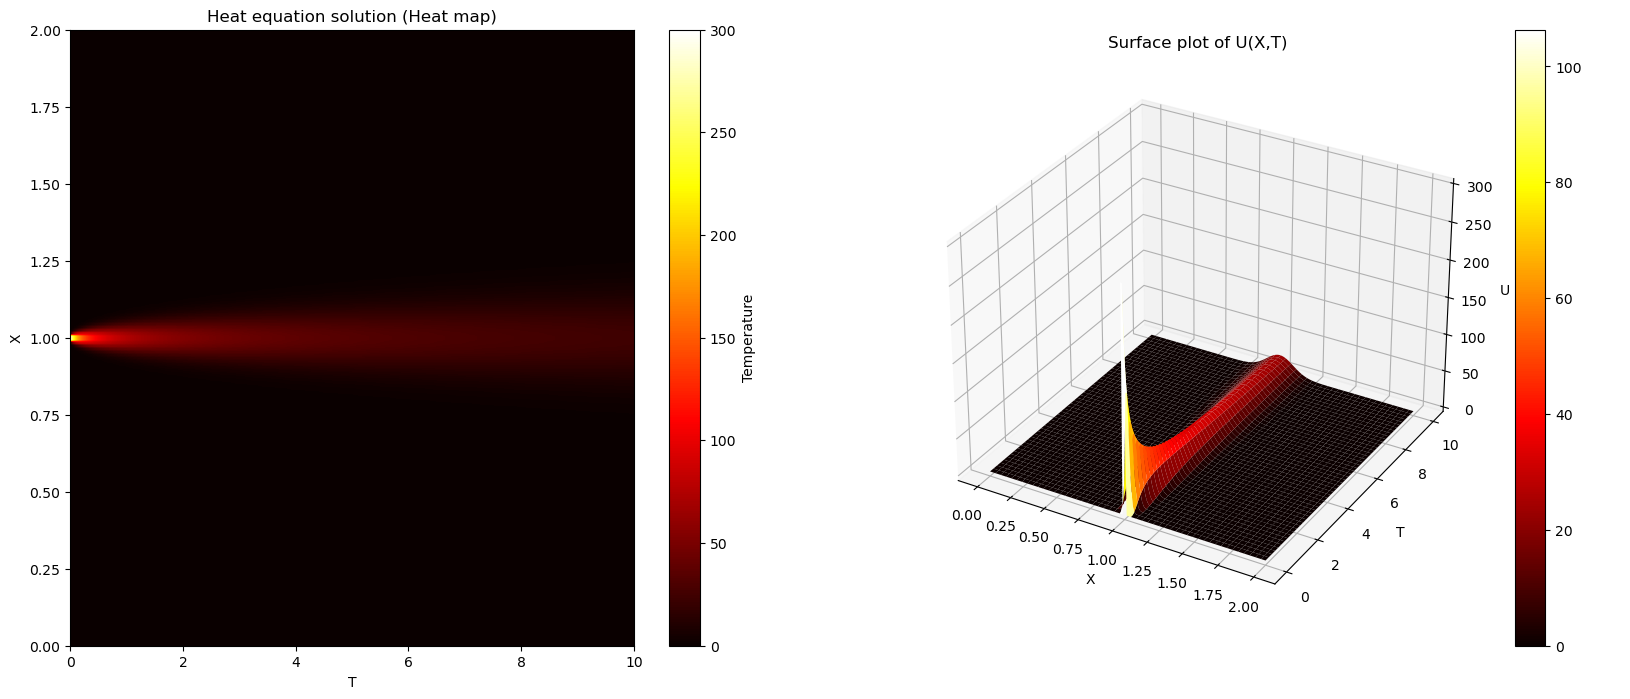

In [3]:
#Q3 HEAT EQ

import numpy as np
import matplotlib.pyplot as plt
import lib_ar
from scipy import sparse
import math


# Crank-Nicolson method as defined in the library
'''
#Crank Nicolson method for 1D heat equation
def crank_nicolson_1d(M, N, alpha, u_initial, T, L):
	x0, xL = 0, L
	dx = (xL - x0)/(M-1)
	t0, tF = 0, T 
	dt = (tF - t0)/(N-1)

	a0 = 1 + 2*alpha
	c0 = 1 - 2*alpha

	xspan = np.linspace(x0, xL, M)
	tspan = np.linspace(t0, tF, N)

	# Create the main diagonal for the left-hand side matrix with all elements as a0
	maindiag_a0 = a0*np.ones((1,M))

	# Create the off-diagonal for the left-hand side matrix with all elements as -alpha
	offdiag_a0 = (-alpha)*np.ones((1, M-1))

	# Create the main diagonal for the right-hand side matrix with all elements as c0
	maindiag_c0 = c0*np.ones((1,M))

	# Create the off-diagonal for the right-hand side matrix with all elements as alpha
	offdiag_c0 = alpha*np.ones((1, M-1))

	# Create the left-hand side tri-diagonal matrix
	# Get the length of the main diagonal
	a = maindiag_a0.shape[1]

	# Create a list of the diagonals
	diagonalsA = [maindiag_a0, offdiag_a0, offdiag_a0]

	# Create the tri-diagonal matrix using the sparse library
	# The matrix is then converted to a dense matrix using toarray()
	A = sparse.diags(diagonalsA, [0,-1,1], shape=(a,a)).toarray()

	# Modify specific elements of the matrix to apply certain boundary conditions
	A[0,1] = (-2)*alpha
	A[M-1,M-2] = (-2)*alpha

	# Create the right-hand side tri-diagonal matrix
	# Get the length of the main diagonal
	c = maindiag_c0.shape[1]

	# Create a list of the diagonals
	diagonalsC = [maindiag_c0, offdiag_c0, offdiag_c0]

	# Create the tri-diagonal matrix using the sparse library
	# The matrix is then converted to a dense matrix using toarray()
	Arhs = sparse.diags(diagonalsC, [0,-1,1], shape=(c,c)).toarray()

	# Modify specific elements of the matrix to apply certain boundary conditions
	Arhs[0,1] = 2*alpha
	Arhs[M-1,M-2] = 2*alpha

	#nitializes matrix U
	U = np.zeros((M, N))

	#Initial conditions
	U[:,0] = u_initial(xspan)

	#Boundary conditions
	f = np.arange(1, N+1)
	U[0,:] = 0
	f = U[0,:]
	
	g = np.arange(1, N+1)
	U[-1,:] = 0
	g = U[-1,:]
	
	#k = 1
	for k in range(1, N):
		ins = np.zeros((M-2,1)).ravel()
		b1 = np.asarray([4*alpha*dx*f[k], 4*alpha*dx*g[k]])
		b1 = np.insert(b1, 1, ins)
		b2 = np.matmul(Arhs, np.array(U[0:M, k-1]))
		b = b1 + b2  # Right hand side
		U[0:M, k] = np.linalg.solve(A,b)  # Solving x=A\b
	
	return (U, tspan, xspan)
#'''


# Define the initial condition
def u_init(x):
	return np.where(np.abs(x - L/2) < 0.01, 300.0, 0.0)

T = 10
L = 2
dx = 0.01
dt = 0.01
M = int(L/dx) # spacing in L
N = int(T/dt) # spacing in T
U, tspan, xspan = lib_ar.crank_nicolson_1d(M=M, N=N, u_initial=u_init, alpha = 0.025, T=T, L=L)
#U, tspan, xspan = crank_nicolson_1d(M=M, N=N, u_initial=u_init, alpha = 0.025, T=T, L=L)


# 2D Heat Map
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

im = axs[0].imshow(U, extent=[0, T, 0, L], origin='lower', aspect='auto', cmap='hot')
fig.colorbar(im, ax=axs[0], label='Temperature')
axs[0].set_xlabel('T')
axs[0].set_ylabel('X')
axs[0].set_title('Heat equation solution (Heat map)')


# 3D Surface Plot
T, X = np.meshgrid(tspan, xspan)

for spine in axs[1].spines.values():
	spine.set_visible(False)
axs[1].set(xticklabels=[], yticklabels=[])
axs[1].xaxis.set_ticks_position('none')
axs[1].yaxis.set_ticks_position('none')


ax2 = fig.add_subplot(122, projection='3d')
surf = ax2.plot_surface(X, T, U, cmap='hot')

ax2.set_xlabel('X')
ax2.set_ylabel('T')
ax2.set_zlabel('U')
ax2.set_title('Surface plot of U(X,T)')
fig.colorbar(surf, ax=ax2)

print("\n Plots for Q3 : \n")

plt.show()

In [4]:
#Q4 MASS CENTER USING SIMPSONS RULE

import numpy as np
import math
import lib_ar

# Define the linear mass density function
def lambda_x(x):
    return x**2

# Define the length of the beam
a = 0
b = 2

# Define the function x*λ(x) for the integral in the formula for x_cm
def x_lambda_x(x):
    return x * lambda_x(x)

print("\n Calculation Q4 \n")
print(f'Function to be solved : \n x_cm = (1/M) * ∫[a to b] x*λ(x) dx \n')

# calculate the integral using Simpson's rule and Gaussian quadrature
n = 100
Mass = lib_ar.simpsons_rule(lambda_x, a, b, n)
x_cm = (1/Mass) * lib_ar.simpsons_rule(x_lambda_x, a, b, n)
print(f"The mass of the beam is {Mass:.4f} kg.")
print(f"The center of mass is at x =, {x_cm:.4f} meters.")


 Calculation Q4 

Function to be solved : 
 x_cm = (1/M) * ∫[a to b] x*λ(x) dx 

The mass of the beam is 2.6667 kg.
The center of mass is at x =, 1.5000 meters.


In [5]:
#Q5 LU DECOMPOSITION

import lib_ar

with open('m5.txt', 'r') as f1:
    lq3 = [[int(num) for num in line.split(',')] for line in f1 ]

with open('s5.txt', 'r') as f2:
    kq3 = [[int(num) for num in line.split(',')] for line in f2 ]

print("\n Calculation Q5 \n")
lib_ar.printeq(lq3,kq3,'X','Given')

pq3=lib_ar.pivotmat(lq3)

kq3=lib_ar.crossmat(pq3,kq3)

L3,U3=lib_ar.LUdecomposition(lq3,pq3)


lib_ar.printeq(L3,kq3,'Y','For forward subsitution the given')

kq31=lib_ar.forwardsub(L3,kq3)
print('\n After forward subsitution Matrix Y is: \n', kq31)


lib_ar.printeq(U3,kq31,'X','For backward subsitution the given')

kq32=lib_ar.backwardsub(U3,kq31)
print('\n After backward subsitution the answer matrix X is: \n',kq32)


 Calculation Q5 


 Given system of linear equations is: 

[1, -1, 4, 0, 2, 9] ( X 1 ) [19]
[0, 5, -2, 7, 8, 4] ( X 2 ) [2]
[1, 0, 5, 7, 3, -2] ( X 3 ) [13]
[6, -1, 2, 3, 0, 8] ( X 4 ) [-7]
[-4, 2, 0, 5, -5, 3] ( X 5 ) [-9]
[0, 7, -1, 5, 4, -2] ( X 6 ) [2]

 The lower triangle matrix is: 

[1.0, 0, 0, 0, 0, 0]
[0.0, 1.0, 0, 0, 0, 0]
[0.16666666666666666, 0.023809523809523808, 1.0, 0, 0, 0]
[-0.6666666666666666, 0.1904761904761905, 0.3248730964467005, 1.0, 0, 0]
[0.16666666666666666, -0.11904761904761905, 0.7563451776649746, -1.19029374201788, 1.0, 0]
[0.0, 0.7142857142857143, -0.2741116751269035, 1.3026819923371646, -1.9051566904327637, 1.0]

 The upper triangle matrix is: 

[6.0, -1.0, 2.0, 3.0, 0.0, 8.0]
[0, 7.0, -1.0, 5.0, 4.0, -2.0]
[0, 0, 4.690476190476191, 6.380952380952381, 2.9047619047619047, -3.2857142857142856]
[0, 0, 0, 3.9746192893401013, -6.7055837563451774, 9.781725888324873]
[0, 0, 0, 0, -7.70242656449553, 21.556832694763727]
[0, 0, 0, 0, 0, 32.85458464599568]

 For for